# k-fold cross-validation
In k-fold cross-validation, we randomly split the dataset into k folds without
replacement (when a sample is randomly selected is not put back into the sample collection), 
k - 1 folds are used for the model training and one fold is used for testing. 
This procedure is repeated k times so that we obtain k models and performance estimates. 
We then calculate the average performance to obtain an estimate that is less sensitive to the subpartitioning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

## Load the dataset

In [2]:
df = pd.read_csv('../Datasets/Age_blood_pressure.csv').sample(frac=1) #to shuffle the DataFrame rows
df.head()

,Age,Systolic Blood Pressure
40,57,153.828624
157,22,110.792587
76,68,192.245081
180,15,114.657505
150,65,183.778549


In [3]:
df.shape

(199, 2)

## Select the features

In [4]:
x = df.iloc[:,[0]]
y = df.iloc[:,1]

## The Model

In [5]:
model = LinearRegression()

## Evaluate the model with cross-validation

In [6]:
scores = cross_val_score(model, x, y, cv=5, n_jobs=-1) 
scores

array([ 0.60660144,  0.59215649,  0.49910424,  0.52818262,  0.44316376])

In [7]:
scores.mean()

0.53384171151613324

## Make predictions with cross-validation

In [8]:
y_pred = cross_val_predict(model, x, y, cv=5, n_jobs=-1)

In [9]:
r2_score(y,y_pred)

0.54767591977496255

## Compare data with prediction

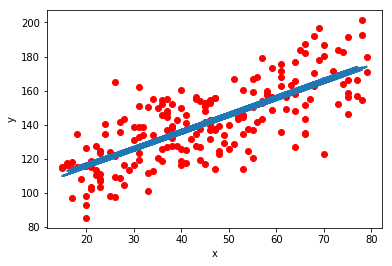

In [10]:
plt.scatter(x,y,c='r')
plt.plot(x,y_pred,lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()